# Company Twitter Tags

## Background

We have previously extracted Job profiles of Data Analysts in Massachusetts from https://Indeed.com. The prime source of extraction is through web scarping and the data is munged to obtain a consistent dataset. The data has been extracted using Selenium and BeautifulSoup. Furthermore, the dataset was cleaned and audited to make it unique and error free.

The conceptual form of the database is shown in the ER diagram.

Once the cleaned dataset was obtained, the dataframe was converted to SQL using SQLAlchemy and the data is inserted. The database engine sqlite is then connected to jupyter notebook. Any queries can then be executed from jupyter notebook and the output is displayed.

## Abstract

Now, we have first installed the Tweepy library and acquired twitter API information by placing a request through Twitter Developer optoins. We read the CSV file 'job_filetwitter' which contains information such as the Company name, company twitter handle, job role, location, salary etc. After defining the API keys and access tokens we have used the Twitter API to get the companies'tweets. We then go on to analyze these tweets for certain tags and keywords to evaluate certain cases. We use these insights to understand the hiring capability, the social standing and COVID situation with these companies.

### Installing the Tweepy library for accessing the Twitter API.

In [28]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries 

In [2]:
import os
import pandas as pd
import tweepy as tw

### Reading the CSV file 'job_filetwitter' 

In [32]:
jobdata=pd.read_csv('job_filetwitter.csv')

### Printing the CSV file 'job_filetwitter'  

In [33]:
jobdata

,Job_Title,Company,Company_Handle,Location,Summary,Salary,Rating,Job_ID
0,Business Analyst,Bay State College,baystatecollege,"Boston, MA 02116 (Back Bay area)",Business Analysis: 3 years (Required).\nThe Bu...,None,3.9,1
1,Data Analyst,Clinedge,ClinEdge,"North Quincy, MA",You will process data and reconcile the paymen...,None,3.8,2
2,"Analyst II, Data Science",Liberty Mutual Insurance,LibertyMutual,"Boston, MA 02101",Collaborate with business partners to develop ...,"$89,700 - $148,800 a year",3.6,4
3,Data Analyst Health Care,Tufts University,TuftsUniversity,"Boston, MA 02111 (Chinatown area)",1-3 years experience required.\nThe Nutrition ...,"$50,000 - $60,000 a year",4.1,5
4,Data Analyst,Tufts University,TuftsUniversity,"Boston, MA 02111 (Chinatown area)",1-3 years experience required.\nThe Nutrition ...,"$50,000 - $60,000 a year",4.1,6
...,...,...,...,...,...,...,...,...
59,Data Analyst – University Graduate,PayPal,PayPal,"Newton, MA","In the process, you will develop a deep unders...",None,3.9,201
60,Next Generation Sequencing Data Analyst – Scie...,Biogen,biogen,"Cambridge, MA 02142 (East Cambridge area)",The Genome Technologies and Computational Scie...,None,4,202
61,"INVESTMENT ANALYST, Endowment Investment Office",Boston University,BU_Tweets,"Boston, MA 02215 (Kenmore area)",The Investment Analyst will report to the Chie...,None,4.1,203
62,Data Analysis and Computational Scientists,Systems Analytics,analyticsystems,"Waltham, MA",We have a number of openings for applied mathe...,None,None,204


### Defining the API keys and Access tokens

In [5]:
api_key= 'oXwTHAuHz9efkni6qnw5ukOd4'
api_secret_key= 'tKT5kyAvBHmuX2JgJH1lvMYYxXrmpgnyNfcCzGWBq1GAW'
access_token= '4443869112-xESKHkPgBmwWrLqAAerchhmdb5HOjnHdYDHjZRd'
access_token_secret= 'Zk9MtZN09VbyDx5cYuMZFdPjBoVToMqGNMrkTLArAQ'

In [6]:
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Getting the Company Twitter Users

In [7]:
companytwit=jobdata['Company_Handle'].values.tolist()[:64]

### Printing the Company Twitter Handles from our Database

In [8]:
companytwit

['baystatecollege',
 'ClinEdge',
 'LibertyMutual',
 'TuftsUniversity',
 'TuftsUniversity',
 'hopjumptravel',
 'MilliporeSigma',
 'hopjumptravel',
 'caredash',
 'IEnduranceGroup',
 'TakedaPharma',
 'CambridgeBank',
 'Northeastern',
 'CogoLabs',
 'YeswayStores',
 'edXOnline',
 'ZoomInfo',
 'The_Hanover',
 'CambridgeIntern',
 'NTTDATAServices',
 'BostonChildrens',
 'CCA_Mass',
 'miraclesoft',
 'massmutual',
 'Acara_Solutions',
 'scismic',
 'massmutual',
 'edXOnline',
 'massmutual',
 'massmutual',
 'SunLife',
 'BostonChildrens',
 'McKinsey',
 'StateStreet',
 'BU_Tweets',
 'biogen',
 'StateStreet',
 'StateStreet',
 'MidwestClimate',
 'TufinTech',
 'acmeware',
 'massmutual',
 'Capgemini',
 'cardinalhealth',
 'perceptiveanaly',
 'brsmeas',
 'Bose',
 'janeirodigital',
 'StateStreet',
 'bworldarena',
 'MidwestClimate',
 'OspreySoftware',
 'Hawkins_Point',
 'massmutual',
 'centric',
 'HybridPathways',
 'HollisterCo',
 'BJsWholesale',
 'Wayfair',
 'PayPal',
 'biogen',
 'BU_Tweets',
 'analyticsyst

### Getting the Companies' Tweets using the Twitter API

In [29]:
companytwitterusers=[]
for i in range(0,len(companytwit)):
    try:
        user = api.get_user(companytwit[i])
        print(user)
        companytwitterusers.append(companytwit[i])
    except:
        pass
    
for user in companytwitterusers:
    for tweet in api.user_timeline(id=user, result_type="recent", count="number"):
        print(tweet.created_at, tweettext) 

User(_api=<tweepy.api.API object at 0x000001B3A0AE48C8>, _json={'id': 18194887, 'id_str': '18194887', 'name': 'Bay State College', 'screen_name': 'baystatecollege', 'location': 'Boston, MA', 'profile_location': None, 'description': 'The official account of Bay State College. A private, career-focused college located in the heart of Boston. #BayStateCollege #MyBayState #BayStateGrad', 'url': 'https://t.co/QuPMlwFzem', 'entities': {'url': {'urls': [{'url': 'https://t.co/QuPMlwFzem', 'expanded_url': 'http://baystate.edu/about-baystate/news-events/news/', 'display_url': 'baystate.edu/about-baystate…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2201, 'friends_count': 150, 'listed_count': 61, 'created_at': 'Wed Dec 17 18:04:07 +0000 2008', 'favourites_count': 322, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 3663, 'lang': None, 'status': {'created_at': 'Wed Apr 22 18:27:18 +0000 2020', 'id': 

NameError: name 'tweettext' is not defined

In [ ]:
users = ["baystatecollege", "ClinEdge", "LibertyMutual", "TuftsUniversity", "hopjumptravel", "MilliporeSigma", "hopjumptravel", "caredash", "IEnduranceGroup", "TakedaPharma", "CambridgeBank", "Northeastern","CogoLabs", "YeswayStores", "edXOnline", "ZoomInfo", "The_Hanover", "CambridgeIntern", "NTTDATAServices", "BostonChildrens", "CCA_Mass", "miraclesoft", "Acara_Solutions", "scismic", "massmutual" ,"edXOnline" ,"massmutual", "SunLife", "BostonChildrens", "McKinsey", "StateStreet", "BU_Tweets", "biogen", "StateStreet", "StateStreet", "MidwestClimate", "TufinTech", "acmeware", "massmutual", "Capgemini", "cardinalhealth", "perceptiveanaly", "brsmeas", "Bose", "janeirodigital", "StateStreet", "bworldarena", "MidwestClimate", "OspreySoftware", "Hawkins_Point", "massmutual", "centric", "HybridPathways", "HollisterCo", "BJsWholesale", "Wayfair", "PayPal", "biogen", "BU_Tweets", "analyticsystems", "Baystate_Health"]


In [ ]:
def function(tweettext, covid):
    for dict in tweet.text:
        if dict['covid'] == covid:
            return dict['users']

### Printing the usernames (Twitter handles) of the Companies

In [34]:
users

['baystatecollege',
 'ClinEdge',
 'LibertyMutual',
 'TuftsUniversity',
 'hopjumptravel',
 'MilliporeSigma',
 'hopjumptravel',
 'caredash',
 'IEnduranceGroup',
 'TakedaPharma',
 'CambridgeBank',
 'Northeastern',
 'CogoLabs',
 'YeswayStores',
 'edXOnline',
 'ZoomInfo',
 'The_Hanover',
 'CambridgeIntern',
 'NTTDATAServices',
 'BostonChildrens',
 'CCA_Mass',
 'miraclesoft',
 'Acara_Solutions',
 'scismic',
 'massmutual',
 'edXOnline',
 'massmutual',
 'SunLife',
 'BostonChildrens',
 'McKinsey',
 'StateStreet',
 'BU_Tweets',
 'biogen',
 'StateStreet',
 'StateStreet',
 'MidwestClimate',
 'TufinTech',
 'acmeware',
 'massmutual',
 'Capgemini',
 'cardinalhealth',
 'perceptiveanaly',
 'brsmeas',
 'Bose',
 'janeirodigital',
 'StateStreet',
 'bworldarena',
 'MidwestClimate',
 'OspreySoftware',
 'Hawkins_Point',
 'massmutual',
 'centric',
 'HybridPathways',
 'HollisterCo',
 'BJsWholesale',
 'Wayfair',
 'PayPal',
 'biogen',
 'BU_Tweets',
 'analyticsystems',
 'Baystate_Health']

In [30]:
compdict = {}
def compSearch(query):
    tweets = []
    count = 500
    
    searchresult = api.search(q=query,count=count,since="2020-02-20", until="2020-04-09", lang="en")
    for tweet in searchresult:
        tags = []
        hashtags = (tweet._json["entities"]["hashtags"])
        username = tweet._json["user"]['user_name']
        for tag in hashtags:
            tags.append(tag["text"])
        if len(tags) == 0:
            tags = ""
        tweetobj ={
                "company_name":query,
                "created_at":tweet.created_at,
                "username":username,
                "id":tweet.id,
                "text":tweet.text,
                "Retweetcount":tweet.retweet_count,
                "FavoriteCount":tweet.favorite_count,
                "tags":tags
        }
        tweets.append(tweetobj)
    compdict[query] = tweets

In [31]:
for startup in users:
    compSearch(startup)

compdict

{'baystatecollege': [],
 'ClinEdge': [],
 'LibertyMutual': [],
 'TuftsUniversity': [],
 'hopjumptravel': [],
 'MilliporeSigma': [],
 'caredash': [],
 'IEnduranceGroup': [],
 'TakedaPharma': [],
 'CambridgeBank': [],
 'Northeastern': [],
 'CogoLabs': [],
 'YeswayStores': [],
 'edXOnline': [],
 'ZoomInfo': [],
 'The_Hanover': [],
 'CambridgeIntern': [],
 'NTTDATAServices': [],
 'BostonChildrens': [],
 'CCA_Mass': [],
 'miraclesoft': [],
 'Acara_Solutions': [],
 'scismic': [],
 'massmutual': [],
 'SunLife': [],
 'McKinsey': [],
 'StateStreet': [],
 'BU_Tweets': [],
 'biogen': [],
 'MidwestClimate': [],
 'TufinTech': [],
 'acmeware': [],
 'Capgemini': [],
 'cardinalhealth': [],
 'perceptiveanaly': [],
 'brsmeas': [],
 'Bose': [],
 'janeirodigital': [],
 'bworldarena': [],
 'OspreySoftware': [],
 'Hawkins_Point': [],
 'centric': [],
 'HybridPathways': [],
 'HollisterCo': [],
 'BJsWholesale': [],
 'Wayfair': [],
 'PayPal': [],
 'analyticsystems': [],
 'Baystate_Health': []}

## Case

The case that we have considered is whether the company has tweeted about the COVID-19 situation. By looking at the hastags of the tweets, we can observe and pick out terms and keywords which are related to the COVID-19 situation such as 'pandemic', 'COVID-19', 'staysafe', are all popular keyterms which are associated with COVID-19. By observing whether or not a specific company has these terms in their tweets, we can understand a Company's position. Is this company dealing with the crisis effectively, are they still hiring, are they doing anything to fight or help the situation,etc. These are all details which can be critical and decisive for a candidate deciding whether or not to apply to or take up a position at a particular company. So, this tool can help in navigating the job market more effectively given the current scenario.

## ER Diagram 

#  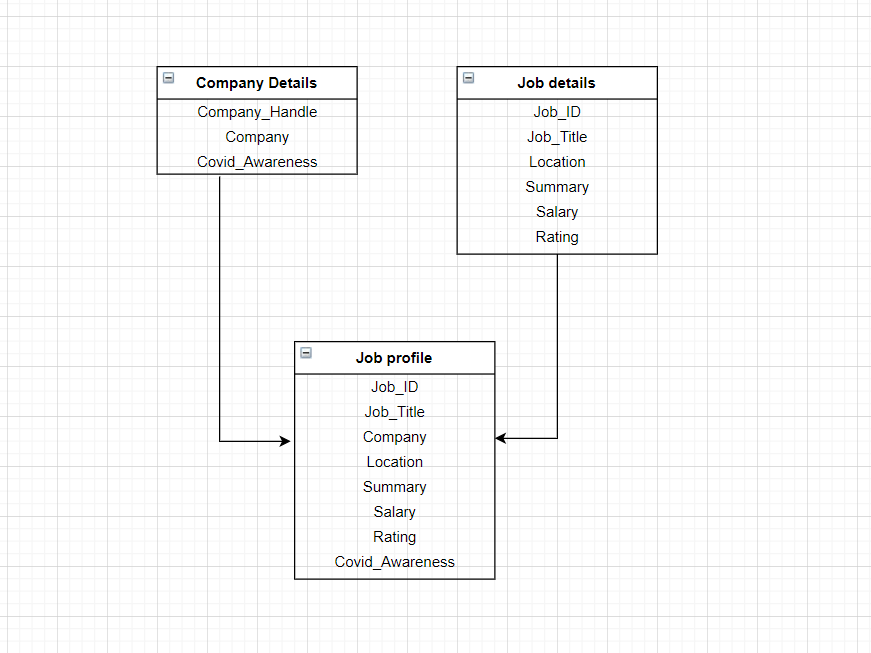

## Citations 

•	https://hackersandslackers.com/extract-data-from-complex-json-python/
•	https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
•	https://www.tweepy.org/
•	https://www.twitter.com/
•	https://developer.twitter.com/en
•   https://stackoverflow.com/questions/17540971/how-to-use-selenium-with-python
•   https://stackoverflow.com/questions/34322471/sqlalchemy-engine-connection-and-session-difference

## Conclusion

We have successfully pulled The company tweets and drawn conclusions by looking at trends and figures of the tweets. We have observed the social awareness and hiring chances by looking at COVID-19 related tweets. We have found some tags to find such tweets. We have also looked for tweets directly related to hiring by looking into the tweets with tags such as 'hiring', 'positions', 'internships', etc. This has allowed us to make decisions regarding applyinng to certain companies and also a ggod idea of the roles and positions which are open predominantly. We can now filter our job search based on some set of criteria which matters to us.